In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('Dataset/credit_debit_preprocessed_transactions/credit_debit_preprocessed_transactions.csv')
df

,Unnamed: 0.1,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,...,user_City,user_State,user_Zipcode,user_Latitude,user_Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,0,0,0,2002.0,9.0,1.0,06:21,134.09,Swipe Transaction,...,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5
1,1,1,0,0,2002.0,9.0,1.0,06:42,38.48,Swipe Transaction,...,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5
2,2,2,0,0,2002.0,9.0,2.0,06:22,120.34,Swipe Transaction,...,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5
3,3,3,0,0,2002.0,9.0,2.0,17:45,128.95,Swipe Transaction,...,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5
4,4,4,0,0,2002.0,9.0,3.0,06:23,104.71,Swipe Transaction,...,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899995,899995,66,0,2010.0,7.0,16.0,14:56,51.70,Online Transaction,...,Gonzales,TX,78629,29.50,-97.44,15092,10869,1820,820,2
899996,899996,899996,66,0,2010.0,7.0,16.0,15:27,23.10,Swipe Transaction,...,Gonzales,TX,78629,29.50,-97.44,15092,10869,1820,820,2
899997,899997,899997,66,0,2010.0,7.0,16.0,16:24,19.55,Swipe Transaction,...,Gonzales,TX,78629,29.50,-97.44,15092,10869,1820,820,2
899998,899998,899998,66,0,2010.0,7.0,17.0,07:36,42.32,Online Transaction,...,Gonzales,TX,78629,29.50,-97.44,15092,10869,1820,820,2


In [6]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [61]:
df.drop('Expires', axis=1, inplace=True)  #As it's not required, txn fails if the card expired

KeyError: "['Expires'] not found in axis"

In [56]:
df.dtypes

User                             int64
Card                             int64
Year                           float64
Month                          float64
Day                            float64
Time                            object
Amount                         float64
Use Chip                        object
Merchant Name                  float64
Merchant City                   object
Merchant State                  object
Zip                            float64
MCC                            float64
Errors?                         object
Is Fraud?                       object
Card Brand                      object
Card Type                       object
Card Number                      int64
CVV                              int64
Has Chip                        object
Cards Issued                     int64
Credit Limit                     int64
Acct Open Date                  object
Year PIN last Changed            int64
Card on Dark Web                object
Person                   

In [57]:
df.nunique()

User                              67
Card                               8
Year                              23
Month                             12
Day                               31
Time                            1440
Amount                         32070
Use Chip                           3
Merchant Name                   9615
Merchant City                   4609
Merchant State                   120
Zip                             8374
MCC                              109
Errors?                            1
Is Fraud?                          2
Card Brand                         4
Card Type                          3
Card Number                      191
CVV                              178
Has Chip                           2
Cards Issued                       3
Credit Limit                     183
Acct Open Date                   109
Year PIN last Changed             15
Card on Dark Web                   1
Person                            67
Current Age                       37
R

## Analysing the object datatype colums

In [58]:
df['Time'].head(100)

0      06:21
1      06:42
2      06:22
3      17:45
4      06:23
       ...  
101    06:24
102    06:26
103    08:24
104    06:10
105    06:44
Name: Time, Length: 100, dtype: object

In [25]:
df['Time'].nunique()

1440

In [26]:
df['Use Chip'].unique()

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

In [28]:
df['Merchant City'].unique()

array(['La Verne', 'Monterey Park', 'ONLINE', ..., 'Berthoud',
       'Manzanita', 'Newberg'], dtype=object)

In [29]:
df['Merchant City'].nunique()

4618

In [30]:
df['Errors?'].unique()

array(['No Error', 'Technical Glitch', 'Insufficient Balance', 'Bad PIN',
       'Bad PIN,Insufficient Balance', 'Bad Expiration',
       'Bad PIN,Technical Glitch', 'Bad Card Number', 'Bad CVV',
       'Bad Zipcode', 'Insufficient Balance,Technical Glitch',
       'Bad Card Number,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Bad Expiration',
       'Bad Expiration,Bad CVV', 'Bad Expiration,Insufficient Balance',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration,Technical Glitch',
       'Bad CVV,Technical Glitch'], dtype=object)

In [31]:
df['Is Fraud?'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['Card Brand'].unique()

array(['Visa', 'Mastercard', 'Discover', 'Amex'], dtype=object)

In [33]:
df['Card Type'].unique()

array(['Debit', 'Credit', 'Debit (Prepaid)'], dtype=object)

In [35]:
df['Has Chip'].unique()

array(['YES', 'NO'], dtype=object)

In [36]:
df['Acct Open Date'].unique()

array(['09/2002', '04/2014', '07/2003', '01/2003', '09/2008', '09/2003',
       '02/2011', '06/2010', '07/2006', '10/2009', '03/2002', '03/2019',
       '09/2009', '01/2011', '02/2007', '11/2010', '12/1999', '01/2002',
       '09/2007', '11/2005', '06/2005', '09/2010', '10/2014', '01/2020',
       '11/2009', '09/2017', '01/2005', '01/2012', '05/2012', '07/2009',
       '02/2020', '01/2007', '12/2008', '12/2012', '08/2007', '08/2016',
       '06/2002', '02/2002', '01/2008', '08/2013', '08/2003', '09/2016',
       '02/2004', '12/2009', '01/2006', '02/2000', '01/1998', '03/2009',
       '07/2002', '11/2014', '09/2001', '05/2005', '03/2012', '10/2006',
       '08/2008', '10/2010', '05/2010', '10/2016', '08/2005', '06/2008',
       '12/2003', '03/2006', '03/2005', '12/2006', '12/2017', '01/2014',
       '03/2001', '02/2009', '06/2007', '04/2008', '11/2003', '07/2012',
       '12/2016', '02/1999', '10/2013', '08/2011', '03/2013', '12/2010',
       '08/2014', '05/2004', '04/2005', '04/2010', 

In [37]:
df['Acct Open Date'].nunique()

109

In [39]:
df['Card on Dark Web'].nunique()

1

In [40]:
df['Person'].unique()

array(['Hazel Robinson', 'Sasha Sadr', 'Saanvi Lee', 'Everlee Clark',
       'Kyle Peterson', 'Aldo Walker', 'Katalina Lewis', 'Ryland Howard',
       'Kenya Cooper', 'Sawyer Butler', 'Antonio Ryan', 'Elliot Edwards',
       'Romina Garcia', 'Keanu Chen', 'Poppy Flores', 'Riya Cruz',
       'Saul Walker', 'Anahi Rogers', 'Cayden Rivera',
       'Cristiano Jenkins', 'Blaine Murphy', 'Grayson Diaz',
       'Yadiel Miller', 'Roland King', 'Cole Xi', 'Jade Green',
       'Amaya Stewart', 'Grant Gray', 'Oliver Reed', 'Aminah Collins',
       'Ulises Neufelder', 'Tristan Hughes', 'Madalynn Gutierrez',
       'Rosa Faraday', 'Brynn Allen', 'Aden Adams', 'Haylee Baker',
       'Nehemiah Turner', 'Simon Adams', 'Sunny King', 'Harper Jackson',
       'Thomas Burns', 'Titan Flores', 'Leslie Myers', 'Joaquin Parker',
       'Butch Brooks', 'Kiera Allen', 'Lylah Peres', 'Ty Jackson',
       'Bodhi Nguyen', 'Chaya Howard', 'Kyleigh Rogers', 'Mikaela Martin',
       'Luella Perry', 'Lainey Gutierrez'

In [41]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
df['user_Address'].unique()

array(['462 Rose Lane', '3606 Federal Boulevard', '766 Third Drive',
       '3 Madison Street', '9620 Valley Stream Drive', '58 Birch Lane',
       '5695 Fifth Street', '1941 Ninth Street', '11 Spruce Avenue',
       '887 Grant Street', '888 Fifth Lane', '8677 Littlewood Lane',
       '829 Fourth Boulevard', '74786 Jefferson Drive', '781 East Street',
       '40 Washington Drive', '3994 Hillside Drive', '172 Birch Street',
       '8145 Spruce Boulevard', '153 Tenth Lane', '2473 Lake Avenue',
       '970 Essex Drive', '9186 Washington Avenue', '5073 Wessex Avenue',
       '195 Eighth Boulevard', '801 Mill Boulevard', '6914 Wessex Avenue',
       '776 Norfolk Boulevard', '2015 Bayview Avenue',
       '108 Washington Street', '660 Seventh Drive',
       '7505 Tenth Boulevard', '4930 Birch Drive', '93 Plum Lane',
       '837 Lincoln Avenue', '7467 Spruce Drive', '6323 Sussex Boulevard',
       '8738 Fourth Street', '9344 Mill Drive', '299 11th Street',
       '5492 Maple Drive', '829 Birch

In [43]:
df['user_City'].nunique()

64

In [44]:
df['user_State'].nunique()

31

## Filtering the data with No errors, as if there an error it measn transaction is not successful

In [54]:
df = df[df['Errors?'] == 'No Error']

## Creating new Time column with categorical values like Morning, afternoon etc 

In [63]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

C:\Users\shivani.padal\AppData\Local\Temp\ipykernel_9040\3943141377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time


In [66]:
df['Time']

0         06:21:00
1         06:42:00
2         06:22:00
3         17:45:00
4         06:23:00
            ...   
899995    14:56:00
899996    15:27:00
899997    16:24:00
899998    07:36:00
899999    14:40:00
Name: Time, Length: 885545, dtype: object

In [70]:
# Function to categorize time
def categorize_time(time):
    if time >= pd.to_datetime('05:00', format='%H:%M').time() and time < pd.to_datetime('08:00', format='%H:%M').time():
        return 'Early morning'
    elif time >= pd.to_datetime('08:00', format='%H:%M').time() and time < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00', format='%H:%M').time() and time < pd.to_datetime('17:00', format='%H:%M').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00', format='%H:%M').time() and time < pd.to_datetime('20:00', format='%H:%M').time():
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create 'Time_new' column
df['Time_new'] = df['Time'].apply(categorize_time)

C:\Users\shivani.padal\AppData\Local\Temp\ipykernel_9040\3482768847.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_new'] = df['Time'].apply(categorize_time)


In [71]:
## Remove user_Address, We need only like state, country 
df.drop('user_Address', axis=1, inplace=True)

C:\Users\shivani.padal\AppData\Local\Temp\ipykernel_9040\3061556031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('user_Address', axis=1, inplace=True)


In [75]:
df.drop('Card on Dark Web', axis=1, inplace=True)

C:\Users\shivani.padal\AppData\Local\Temp\ipykernel_9040\1667112387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Card on Dark Web', axis=1, inplace=True)


In [76]:
df.dtypes

User                             int64
Card                             int64
Year                           float64
Month                          float64
Day                            float64
Time                            object
Amount                         float64
Use Chip                        object
Merchant Name                  float64
Merchant City                   object
Merchant State                  object
Zip                            float64
MCC                            float64
Errors?                         object
Is Fraud?                       object
Card Brand                      object
Card Type                       object
Card Number                      int64
CVV                              int64
Has Chip                        object
Cards Issued                     int64
Credit Limit                     int64
Acct Open Date                  object
Year PIN last Changed            int64
Person                          object
Current Age              

In [77]:
df['Is Fraud?'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
df['Is Fraud?'] = df['Is Fraud?'].replace({'Yes': 1, 'No': 0}).astype(int)

C:\Users\shivani.padal\AppData\Local\Temp\ipykernel_9040\1891147260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is Fraud?'] = df['Is Fraud?'].replace({'Yes': 1, 'No': 0}).astype(int)


In [80]:
df.select_dtypes(include=['object'])

,Time,Use Chip,Merchant City,Merchant State,Errors?,Card Brand,Card Type,Has Chip,Acct Open Date,Person,Gender,user_City,user_State,Time_new
0,06:21:00,Swipe Transaction,La Verne,CA,No Error,Visa,Debit,YES,09/2002,Hazel Robinson,Female,La Verne,CA,Early morning
1,06:42:00,Swipe Transaction,Monterey Park,CA,No Error,Visa,Debit,YES,09/2002,Hazel Robinson,Female,La Verne,CA,Early morning
2,06:22:00,Swipe Transaction,Monterey Park,CA,No Error,Visa,Debit,YES,09/2002,Hazel Robinson,Female,La Verne,CA,Early morning
3,17:45:00,Swipe Transaction,Monterey Park,CA,No Error,Visa,Debit,YES,09/2002,Hazel Robinson,Female,La Verne,CA,Evening
4,06:23:00,Swipe Transaction,La Verne,CA,No Error,Visa,Debit,YES,09/2002,Hazel Robinson,Female,La Verne,CA,Early morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,14:56:00,Online Transaction,ONLINE,online,No Error,Visa,Debit,YES,05/1999,Layne Butler,Male,Gonzales,TX,Afternoon
899996,15:27:00,Swipe Transaction,Gonzales,TX,No Error,Visa,Debit,YES,05/1999,Layne Butler,Male,Gonzales,TX,Afternoon
899997,16:24:00,Swipe Transaction,Gonzales,TX,No Error,Visa,Debit,YES,05/1999,Layne Butler,Male,Gonzales,TX,Afternoon
899998,07:36:00,Online Transaction,ONLINE,online,No Error,Visa,Debit,YES,05/1999,Layne Butler,Male,Gonzales,TX,Early morning


In [85]:
# col_to_remove = ['Time', 'Errors?','Acct Open Date', 'Person' ]

# df = df.drop(columns=col_to_remove, axis=1)

df.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,...,user_State,user_Zipcode,user_Latitude,user_Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Time_new
0,0,0,2002.0,9.0,1.0,134.09,Swipe Transaction,3.527213e+18,La Verne,CA,...,CA,91750,34.15,-117.76,29278,59696,127613,787,5,Early morning
1,0,0,2002.0,9.0,1.0,38.48,Swipe Transaction,-7.276121e+17,Monterey Park,CA,...,CA,91750,34.15,-117.76,29278,59696,127613,787,5,Early morning
2,0,0,2002.0,9.0,2.0,120.34,Swipe Transaction,-7.276121e+17,Monterey Park,CA,...,CA,91750,34.15,-117.76,29278,59696,127613,787,5,Early morning
3,0,0,2002.0,9.0,2.0,128.95,Swipe Transaction,3.414527e+18,Monterey Park,CA,...,CA,91750,34.15,-117.76,29278,59696,127613,787,5,Evening
4,0,0,2002.0,9.0,3.0,104.71,Swipe Transaction,5.817218e+18,La Verne,CA,...,CA,91750,34.15,-117.76,29278,59696,127613,787,5,Early morning


In [86]:
from sklearn.preprocessing import LabelEncoder

# Select columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each object-type column
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

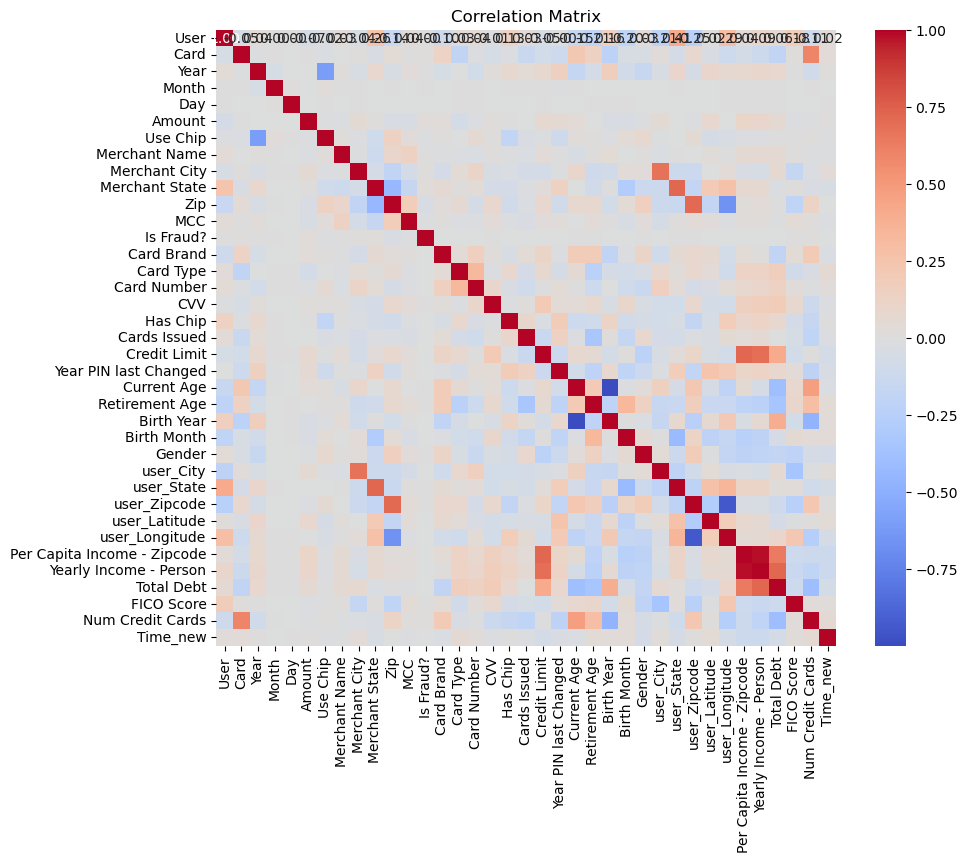

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()



In [90]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for considering correlations
threshold = 0.5

# Find pairs of columns with correlation above the threshold
high_corr_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Extract the column pairs, excluding self-correlations
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                   for x, y in zip(*high_corr_pairs) if x != y]

# Remove duplicate pairs (e.g., (A, B) and (B, A))
unique_high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)

# Display the highly correlated pairs
for pair in unique_high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have a correlation coefficient above {threshold}.")


Columns Use Chip and Year have a correlation coefficient above 0.5.
Columns Birth Year and Current Age have a correlation coefficient above 0.5.
Columns Merchant State and user_State have a correlation coefficient above 0.5.
Columns Zip and user_Longitude have a correlation coefficient above 0.5.
Columns Card and Num Credit Cards have a correlation coefficient above 0.5.
Columns Credit Limit and Yearly Income - Person have a correlation coefficient above 0.5.
Columns Per Capita Income - Zipcode and Yearly Income - Person have a correlation coefficient above 0.5.
Columns Per Capita Income - Zipcode and Total Debt have a correlation coefficient above 0.5.
Columns Merchant City and user_City have a correlation coefficient above 0.5.
Columns Total Debt and Yearly Income - Person have a correlation coefficient above 0.5.
Columns Credit Limit and Per Capita Income - Zipcode have a correlation coefficient above 0.5.
Columns user_Longitude and user_Zipcode have a correlation coefficient above 